<h1 id='tocheading'>Table of Content</h1>
<div id='toc'></div>

In [87]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Data Cleaning

In [2]:
# frequently used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from datetime import date

## Order Dataset

In [3]:
# read data and show its high-level information
order_df = pd.read_csv('olist_orders_dataset.csv')
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
# drop irrelevant columns
order_df.drop(['order_status',
               'order_delivered_carrier_date',
               'order_approved_at',
               'order_delivered_customer_date',
               'order_estimated_delivery_date'], axis='columns', inplace=True)
order_df.columns

In [ ]:
# assign datetime data type for date/time columns  
order_df.order_purchase_timestamp = pd.to_datetime(order_df.order_purchase_timestamp)
order_df.dtypes

In [ ]:
order_df.order_purchase_timestamp = order_df.order_purchase_timestamp.dt.date
#pocipr_df['order_purchase_timestamp'] = pocipr_df['order_purchase_timestamp'].dt.date

In [4]:
# duplicate rows of dataframe
order_df[order_df.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


In [6]:
# head of values
order_df.head()

,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13


## Customer Dataset

In [7]:
# read data and show its high-level information
customer_df = pd.read_csv('olist_customers_dataset.csv')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
customer_id                 99441 non-null object
customer_unique_id          99441 non-null object
customer_zip_code_prefix    99441 non-null int64
customer_city               99441 non-null object
customer_state              99441 non-null object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
# drop irrelevant columns
customer_df.drop(['customer_zip_code_prefix',
                  'customer_city'], axis='columns', inplace=True)

In [10]:
customer_df.nunique()

customer_id           99441
customer_unique_id    96096
customer_state           27
dtype: int64

In [8]:
# duplicate rows of dataframe
customer_df[customer_df.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


In [11]:
# head of values
customer_df.head()

,customer_id,customer_unique_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP


## Payment Dataset

In [12]:
# read data and show its high-level information
payment_df = pd.read_csv('olist_order_payments_dataset.csv')
payment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
order_id                103886 non-null object
payment_sequential      103886 non-null int64
payment_type            103886 non-null object
payment_installments    103886 non-null int64
payment_value           103886 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [13]:
# drop irrelevant columns
payment_df.drop('payment_sequential', axis='columns', inplace=True)

In [15]:
# head of values
payment_df.head()

,order_id,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2,128.45


In [14]:
# duplicate rows of dataframe
payment_df[payment_df.duplicated()]

,order_id,payment_type,payment_installments,payment_value
3675,8ca5bdac5ebe8f2d6fc9171d5ebc906a,voucher,1,15.00
4829,59d02be1c50fb6e6930cafd6ff6a31e5,voucher,1,20.00
5091,4689b1816de42507a7d63a4617383c59,voucher,1,56.42
6940,cf101c3abd3c061ca9f78c1bbb1125af,voucher,1,8.46
7441,d744783ed2ace06cac647a9e64dcbcfd,voucher,1,1.47
...,...,...,...,...
102942,dbc097913df341f30b9f9e92f459cee2,voucher,1,50.00
103046,c5fd5386640ddd76adc482b72d24a02b,voucher,1,5.79
103216,4d9190887b47ff1b89c657c788c038f6,voucher,1,12.80
103551,1ea11b975aea60ca92fa0559184d3d34,voucher,1,12.69


In [16]:
payment_df.nunique()

order_id                99440
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

## Item Dataset

In [17]:
# read data and show its high-level information
item_df = pd.read_csv('olist_order_items_dataset.csv')

In [18]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
order_id               112650 non-null object
order_item_id          112650 non-null int64
product_id             112650 non-null object
seller_id              112650 non-null object
shipping_limit_date    112650 non-null object
price                  112650 non-null float64
freight_value          112650 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
# drop irrelevant columns
item_df.drop('order_item_id', axis='columns', inplace=True)

In [21]:
# drop irrelevant columns
item_df.drop(['seller_id',
              'shipping_limit_date'], axis='columns', inplace=True)
item_df.columns

Index(['order_id', 'product_id', 'price', 'freight_value'], dtype='object')

In [20]:
# duplicate rows of dataframe
item_df[item_df.duplicated()]

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
...,...,...,...,...,...,...
112617,ffecd5a79a0084f6a592288c67e3c298,50fd2b788dc166edd20512370dac54df,8b321bb669392f5163d04c59e235e066,2018-03-05 20:15:27,21.90,15.79
112635,fff8287bbae429a99bb7e8c21d151c41,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14
112641,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19
112642,fffb9224b6fc7c43ebb0904318b10b5f,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58,55.00,34.19


In [22]:
# head of values
item_df.head()

,order_id,product_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90,18.14


## Product Dataset

In [23]:
# read data and show its high-level information
product_df = pd.read_csv('olist_products_dataset.csv')

In [24]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32341 non-null object
product_name_lenght           32341 non-null float64
product_description_lenght    32341 non-null float64
product_photos_qty            32341 non-null float64
product_weight_g              32949 non-null float64
product_length_cm             32949 non-null float64
product_height_cm             32949 non-null float64
product_width_cm              32949 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [26]:
product_df.fillna(product_df.median(), inplace=True)
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32341 non-null object
product_name_lenght           32951 non-null float64
product_description_lenght    32951 non-null float64
product_photos_qty            32951 non-null float64
product_weight_g              32951 non-null float64
product_length_cm             32951 non-null float64
product_height_cm             32951 non-null float64
product_width_cm              32951 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [27]:
product_df.fillna('other', inplace=True)
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
product_id                    32951 non-null object
product_category_name         32951 non-null object
product_name_lenght           32951 non-null float64
product_description_lenght    32951 non-null float64
product_photos_qty            32951 non-null float64
product_weight_g              32951 non-null float64
product_length_cm             32951 non-null float64
product_height_cm             32951 non-null float64
product_width_cm              32951 non-null float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [25]:
# duplicate rows of dataframe
product_df[product_df.duplicated()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


In [28]:
# head of values
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [29]:
product_df.product_category_name.nunique()

74

## Translation Dataset

In [30]:
# read data and show its high-level information
translation_df = pd.read_csv('product_category_name_translation.csv')
translation_df.info()

# head of values
translation_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
product_category_name            71 non-null object
product_category_name_english    71 non-null object
dtypes: object(2)
memory usage: 1.2+ KB


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Review Dataset

In [31]:
# read data and show its high-level information
review_df = pd.read_csv('olist_order_reviews_dataset.csv')
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
review_id                  100000 non-null object
order_id                   100000 non-null object
review_score               100000 non-null int64
review_comment_title       11715 non-null object
review_comment_message     41753 non-null object
review_creation_date       100000 non-null object
review_answer_timestamp    100000 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [33]:
# drop irrelevant columns
review_df.drop(['review_id',
                'review_creation_date',
                'review_answer_timestamp'], axis='columns', inplace=True)
review_df.columns

Index(['order_id', 'review_score', 'review_comment_title',
       'review_comment_message'],
      dtype='object')

In [34]:
for columns in ['review_comment_title', 'review_comment_message']:
    # replace present values with 1
    review_df.loc[review_df[columns].notnull(), columns] = 1
    # replace null values with 0
    review_df.loc[review_df[columns].isna(), columns] = 0
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
order_id                  100000 non-null object
review_score              100000 non-null int64
review_comment_title      100000 non-null int64
review_comment_message    100000 non-null int64
dtypes: int64(3), object(1)
memory usage: 3.1+ MB


In [32]:
# duplicate rows of dataframe
review_df[review_df.duplicated()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


In [35]:
# head of values
review_df.head()

,order_id,review_score,review_comment_title,review_comment_message
0,73fc7af87114b39712e6da79b0a377eb,4,0,0
1,a548910a1c6147796b98fdf73dbeba33,5,0,0
2,f9e4b658b201a9f2ecdecbb34bed034b,5,0,0
3,658677c97b385a9be170737859d3511b,5,0,1
4,8e6bfb81e283fa7e4f11123a3fb894f1,5,0,1


In [36]:
review_df.nunique()

order_id                  99441
review_score                  5
review_comment_title          2
review_comment_message        2
dtype: int64

In [37]:
review_df.review_score.value_counts(normalize=True)

5    0.57420
4    0.19200
1    0.11858
3    0.08287
2    0.03235
Name: review_score, dtype: float64

<BarContainer object of 5 artists>

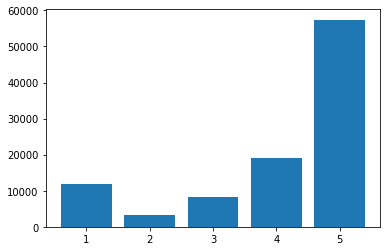

In [38]:
plt.bar(review_df.review_score.value_counts().index, review_df.review_score.value_counts().values)

## Seller Dataset

In [39]:
# read data and show its high-level information
seller_df = pd.read_csv('olist_sellers_dataset.csv')
seller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
seller_id                 3095 non-null object
seller_zip_code_prefix    3095 non-null int64
seller_city               3095 non-null object
seller_state              3095 non-null object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [40]:
# drop irrelevant columns
seller_df.drop(['seller_zip_code_prefix',
                'seller_city'], axis='columns', inplace=True)
seller_df.columns

Index(['seller_id', 'seller_state'], dtype='object')

## Database Joins

In [41]:
oc_df = pd.merge(order_df, customer_df, how='left', on='customer_id')
oc_df.drop('customer_id', axis='columns', inplace=True)
oc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 4 columns):
order_id                    99441 non-null object
order_purchase_timestamp    99441 non-null object
customer_unique_id          99441 non-null object
customer_state              99441 non-null object
dtypes: object(4)
memory usage: 3.8+ MB


In [42]:
ocp_df = pd.merge(oc_df, payment_df, how='left', on='order_id')
ocp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103887 entries, 0 to 103886
Data columns (total 7 columns):
order_id                    103887 non-null object
order_purchase_timestamp    103887 non-null object
customer_unique_id          103887 non-null object
customer_state              103887 non-null object
payment_type                103886 non-null object
payment_installments        103886 non-null float64
payment_value               103886 non-null float64
dtypes: float64(2), object(5)
memory usage: 6.3+ MB


In [43]:
ocpr_df = pd.merge(ocp_df, review_df, how='left', on='order_id')
ocpr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104486 entries, 0 to 104485
Data columns (total 10 columns):
order_id                    104486 non-null object
order_purchase_timestamp    104486 non-null object
customer_unique_id          104486 non-null object
customer_state              104486 non-null object
payment_type                104485 non-null object
payment_installments        104485 non-null float64
payment_value               104485 non-null float64
review_score                104486 non-null int64
review_comment_title        104486 non-null int64
review_comment_message      104486 non-null int64
dtypes: float64(2), int64(3), object(5)
memory usage: 8.8+ MB


In [44]:
ocpri_df = pd.merge(ocpr_df, item_df, how='left', on='order_id')
#ocpri_df.drop('order_id', axis='columns', inplace=True)
ocpri_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 13 columns):
order_id                    119151 non-null object
order_purchase_timestamp    119151 non-null object
customer_unique_id          119151 non-null object
customer_state              119151 non-null object
payment_type                119148 non-null object
payment_installments        119148 non-null float64
payment_value               119148 non-null float64
review_score                119151 non-null int64
review_comment_title        119151 non-null int64
review_comment_message      119151 non-null int64
product_id                  118318 non-null object
price                       118318 non-null float64
freight_value               118318 non-null float64
dtypes: float64(4), int64(3), object(6)
memory usage: 12.7+ MB


In [45]:
ocprip_df = pd.merge(ocpri_df, product_df, how='left', on='product_id')
ocprip_df.drop('product_id', axis='columns', inplace=True)
ocprip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 20 columns):
order_id                      119151 non-null object
order_purchase_timestamp      119151 non-null object
customer_unique_id            119151 non-null object
customer_state                119151 non-null object
payment_type                  119148 non-null object
payment_installments          119148 non-null float64
payment_value                 119148 non-null float64
review_score                  119151 non-null int64
review_comment_title          119151 non-null int64
review_comment_message        119151 non-null int64
price                         118318 non-null float64
freight_value                 118318 non-null float64
product_category_name         118318 non-null object
product_name_lenght           118318 non-null float64
product_description_lenght    118318 non-null float64
product_photos_qty            118318 non-null float64
product_weight_g              118318 

In [46]:
ocprip_df.fillna(ocprip_df.median(), inplace=True)

In [47]:
for column in ['payment_type', 'product_category_name']:
    ocprip_df[column].fillna(ocprip_df[column].value_counts().index[0], inplace=True)

In [48]:
ocprip_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 20 columns):
order_id                      119151 non-null object
order_purchase_timestamp      119151 non-null object
customer_unique_id            119151 non-null object
customer_state                119151 non-null object
payment_type                  119151 non-null object
payment_installments          119151 non-null float64
payment_value                 119151 non-null float64
review_score                  119151 non-null int64
review_comment_title          119151 non-null int64
review_comment_message        119151 non-null int64
price                         119151 non-null float64
freight_value                 119151 non-null float64
product_category_name         119151 non-null object
product_name_lenght           119151 non-null float64
product_description_lenght    119151 non-null float64
product_photos_qty            119151 non-null float64
product_weight_g              119151 

# Exploratory Data Analytics - Stage 1

In [119]:
pocipr_df.payment_type.nunique()

4

In [120]:
pocipr_df.product_category_name_english.nunique()

72

In [121]:
pocipr_df.customer_state.nunique()

27

# Feature Engineering

In [49]:
# group features by customer with approperiate metric
df = ocprip_df.groupby('customer_unique_id').agg({'order_id': 'count',
                                                  'payment_value': 'sum',
                                                  'payment_installments': 'mean',
                                                  'review_score': 'mean',
                                                  'price': 'mean',
                                                  'freight_value': 'mean',
                                                  'product_name_lenght': 'mean',
                                                  'product_description_lenght': 'mean',
                                                  'product_photos_qty': 'mean',
                                                  'product_length_cm': 'mean',
                                                  'product_height_cm': 'mean',
                                                  'product_width_cm': 'mean',
                                                  'review_comment_title': 'mean',
                                                  'review_comment_message': 'mean',
                                                  'payment_type': lambda x: x.value_counts().index[0],
                                                  'product_category_name': lambda x: x.value_counts().index[0],
                                                  'customer_state': lambda x: x.value_counts().index[0],
                                                  'order_purchase_timestamp': lambda x: min((max(ocprip_df.order_purchase_timestamp)-x).dt.days)})
df

,order_id,payment_value,payment_installments,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_length_cm,product_height_cm,product_width_cm,review_comment_title,review_comment_message,payment_type,product_category_name,customer_state,order_purchase_timestamp
customer_unique_id,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,8.0,5.0,129.90,12.00,60.0,236.0,1.0,34.0,7.0,32.0,1.0,1.0,credit_card,cama_mesa_banho,SP,160
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,4.0,18.90,8.29,56.0,635.0,1.0,26.0,11.0,18.0,0.0,0.0,credit_card,beleza_saude,SP,163
0000f46a3911fa3c0805444483337064,1,86.22,8.0,3.0,69.00,17.22,49.0,177.0,3.0,25.0,50.0,35.0,0.0,0.0,credit_card,papelaria,SC,586
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,4.0,4.0,25.99,17.63,43.0,1741.0,5.0,19.0,5.0,11.0,0.0,1.0,credit_card,telefonia,PA,370
0004aac84e0df4da2b147fca70cf8255,1,196.89,6.0,5.0,180.00,16.89,58.0,794.0,3.0,16.0,3.0,11.0,0.0,0.0,credit_card,telefonia,SP,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,4134.84,10.0,5.0,785.00,248.71,54.0,478.5,1.0,55.0,75.0,61.0,0.0,0.0,credit_card,beleza_saude,PE,496
fffea47cd6d3cc0a88bd621562a9d061,1,84.58,1.0,4.0,64.89,19.69,37.0,506.0,2.0,33.0,36.0,27.0,0.0,0.0,credit_card,bebes,BA,311
ffff371b4d645b6ecea244b27531430a,1,112.46,1.0,5.0,89.90,22.56,57.0,716.0,5.0,17.0,15.0,13.0,0.0,0.0,credit_card,automotivo,MT,617


In [140]:
df = pd.read_csv('df.csv', index_col=0)
df

,order_id,payment_value,payment_installments,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_length_cm,product_height_cm,product_width_cm,review_comment_title,review_comment_message,payment_type,product_category_name,customer_state,order_purchase_timestamp
customer_unique_id,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,8.0,5.0,129.90,12.00,60.0,236.0,1.0,34.0,7.0,32.0,1.0,1.0,credit_card,cama_mesa_banho,SP,160
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,4.0,18.90,8.29,56.0,635.0,1.0,26.0,11.0,18.0,0.0,0.0,credit_card,beleza_saude,SP,163
0000f46a3911fa3c0805444483337064,1,86.22,8.0,3.0,69.00,17.22,49.0,177.0,3.0,25.0,50.0,35.0,0.0,0.0,credit_card,papelaria,SC,586
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,4.0,4.0,25.99,17.63,43.0,1741.0,5.0,19.0,5.0,11.0,0.0,1.0,credit_card,telefonia,PA,370
0004aac84e0df4da2b147fca70cf8255,1,196.89,6.0,5.0,180.00,16.89,58.0,794.0,3.0,16.0,3.0,11.0,0.0,0.0,credit_card,telefonia,SP,337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,4134.84,10.0,5.0,785.00,248.71,54.0,478.5,1.0,55.0,75.0,61.0,0.0,0.0,credit_card,beleza_saude,PE,496
fffea47cd6d3cc0a88bd621562a9d061,1,84.58,1.0,4.0,64.89,19.69,37.0,506.0,2.0,33.0,36.0,27.0,0.0,0.0,credit_card,bebes,BA,311
ffff371b4d645b6ecea244b27531430a,1,112.46,1.0,5.0,89.90,22.56,57.0,716.0,5.0,17.0,15.0,13.0,0.0,0.0,credit_card,automotivo,MT,617


In [142]:
df = pd.get_dummies(df)
df

,order_id,payment_value,payment_installments,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_length_cm,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,8.0,5.0,129.90,12.00,60.0,236.0,1.0,34.0,...,0,0,0,0,0,0,0,0,1,0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,4.0,18.90,8.29,56.0,635.0,1.0,26.0,...,0,0,0,0,0,0,0,0,1,0
0000f46a3911fa3c0805444483337064,1,86.22,8.0,3.0,69.00,17.22,49.0,177.0,3.0,25.0,...,0,0,0,0,0,0,1,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,4.0,4.0,25.99,17.63,43.0,1741.0,5.0,19.0,...,0,0,0,0,0,0,0,0,0,0
0004aac84e0df4da2b147fca70cf8255,1,196.89,6.0,5.0,180.00,16.89,58.0,794.0,3.0,16.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,4134.84,10.0,5.0,785.00,248.71,54.0,478.5,1.0,55.0,...,0,0,0,0,0,0,0,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,1,84.58,1.0,4.0,64.89,19.69,37.0,506.0,2.0,33.0,...,0,0,0,0,0,0,0,0,0,0
ffff371b4d645b6ecea244b27531430a,1,112.46,1.0,5.0,89.90,22.56,57.0,716.0,5.0,17.0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analytics - Stage 2

# PCA-based Clustering

## Standard Scaler

In [143]:
#df = df.sample(frac=0.1)

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df)

## Elbow Diagram

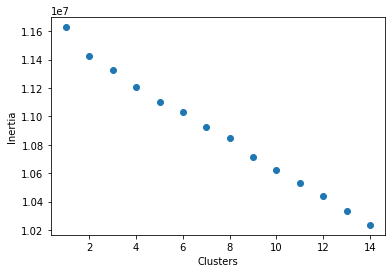

In [145]:
from sklearn.cluster import KMeans
inertia_dict = {}
for k in range(1,15):
    km = KMeans(n_clusters=k).fit(X)
    inertia_dict[k] = km.inertia_
    
plt.scatter(inertia_dict.keys(), inertia_dict.values())
plt.xlabel('Clusters')
plt.ylabel('Inertia');

## Principle Component Analysis

Text(0, 0.5, 'Proportion of Variance Explained')

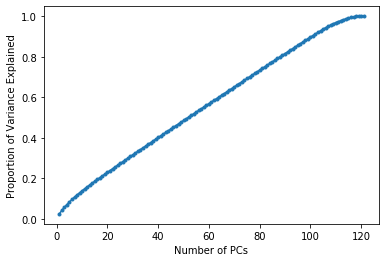

In [146]:
# principle component analysis
from sklearn.decomposition import PCA
n_components = 121
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

plt.plot(range(1,n_components+1), pca.explained_variance_ratio_.cumsum(),marker='.');
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')

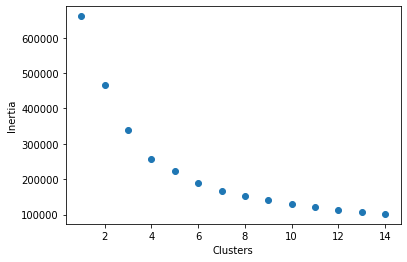

In [147]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
inertia_dict = {}
for k in range(1,15):
    km = KMeans(n_clusters=k).fit(X_pca)
    inertia_dict[k] = km.inertia_
    
plt.scatter(inertia_dict.keys(), inertia_dict.values())
plt.xlabel('Clusters')
plt.ylabel('Inertia');

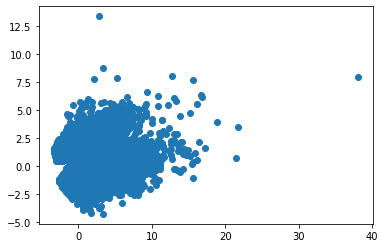

In [148]:
plt.scatter(X_pca[:,0],X_pca[:,1])

## K-means Clusters

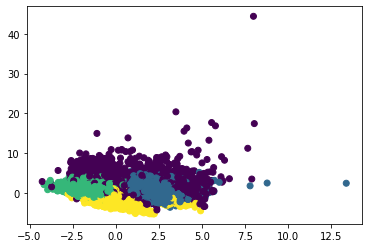

In [149]:
km = KMeans(n_clusters=4).fit(X_pca)
plt.scatter(X_pca[:,1], X_pca[:,2], c=km.labels_)

In [150]:
np.bincount(km.labels_)

array([ 5398, 23267, 40333, 27098], dtype=int64)

In [151]:
km.cluster_centers_

array([[ 4.46404877,  0.63087795,  1.33739388],
       [-1.05223465,  2.1647414 ,  0.4490484 ],
       [-0.63135643, -1.11769396,  0.40461257],
       [ 0.95015751, -0.32165943, -1.25423463]])

In [152]:
km.cluster_centers_[1,1]

2.1647413987156026

In [153]:
from scipy import stats
corr_array=[]
for i in range(df.shape[1]-1):  
    corr_array.append([df.columns[i],
                       np.abs(stats.pearsonr(df[df.columns[i]], X_pca[:,2])[0]),
                       stats.pearsonr(df[df.columns[i]], X_pca[:,2])[0],
                       stats.pearsonr(df[df.columns[i]], X_pca[:,2])[1]])
    
corr_df = pd.DataFrame(corr_array, columns = ['feature', 'abs_corr', 'corr', 'p_value'])
corr_df.sort_values(by='abs_corr', ascending=False, inplace=True)
corr_df.reset_index(drop=True, inplace=True)
corr_df

,feature,abs_corr,corr,p_value
0,product_description_lenght,0.449944,0.449944,0.000000
1,price,0.409805,0.409805,0.000000
2,product_width_cm,0.408260,-0.408260,0.000000
3,product_category_name_cama_mesa_banho,0.392993,-0.392993,0.000000
4,product_length_cm,0.375609,-0.375609,0.000000
...,...,...,...,...
115,product_category_name_climatizacao,0.002294,0.002294,0.477065
116,product_category_name_artes_e_artesanato,0.002156,0.002156,0.504003
117,payment_type_not_defined,0.001322,-0.001322,0.681947
118,product_category_name_moveis_escritorio,0.000811,-0.000811,0.801549


C:\Users\arali\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.713e+31
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        20:29:09   Log-Likelihood:             3.0329e+06
No. Observations:               96096   AIC:                        -6.066e+06
Df Residuals:                   95977   BIC:                        -6.064e+06
Df Model:                         118                                         
Covariance Type:            nonrobust                                         
========================================================================================================================================
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
const                                                                 -5.29e-16   1.53e-17    -34.491      0.000   -5.59e-16   -4.99e-16
order_id                                                                 0.1260    1.8e-17      7e+15      0.000       0.126       0.126
payment_value                                                            0.0476   1.84e-17   2.59e+15      0.000       0.048       0.048
payment_installments                                                    -0.3256   1.82e-17  -1.79e+16      0.000      -0.326      -0.326
review_score                                                            -0.0159   1.61e-17  -9.87e+14      0.000      -0.016      -0.016
price                                                                   -0.0286      2e-17  -1.43e+15      0.000      -0.029      -0.029
freight_value                                                            0.1094   2.11e-17   5.18e+15      0.000       0.109       0.109
product_name_lenght                                                      0.0155   1.61e-17   9.61e+14      0.000       0.016       0.016
product_description_lenght                                              -0.0154   1.71e-17  -9.03e+14      0.000      -0.015      -0.015
product_photos_qty                                                       0.0006   1.66e-17   3.82e+13      0.000       0.001       0.001
product_length_cm                                                        0.1943   2.01e-17   9.68e+15      0.000       0.194       0.194
product_height_cm                                                        0.1286   1.94e-17   6.61e+15      0.000       0.129       0.129
product_width_cm                                                         0.1872   2.07e-17   9.07e+15      0.000       0.187       0.187
review_comment_title                                                    -0.0407    1.8e-17  -2.26e+15      0.000      -0.041      -0.041
review_comment_message                                                  -0.0037   1.72e-17  -2.17e+14      0.000      -0.004      -0.004
order_purchase_timestamp                                                 0.0597   1.75e-17   3.41e+15      0.000       0.060       0.060
payment_type_boleto                                                      0.5337   1.01e-17   5.27e+16      0.000       0.534       0.534
payment_type_credit_card                                                -0.6055   9.02e-18  -6.71e+16      0.000      -0.605      -0.605
payment_type_debit_card                                                  0.0947   1.49e-17   6.36e+15      0.000       0.095       0.095
payment_type_not_defined                                             

Text(0.5, 0, 'normalized coefficient')

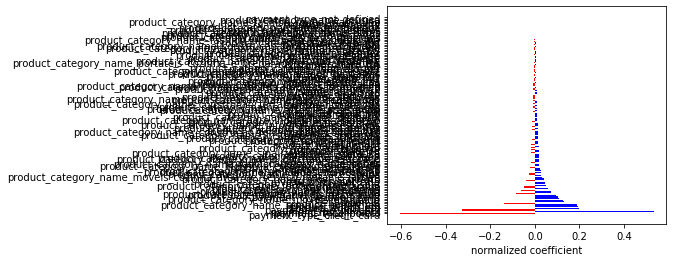

In [154]:
X=df
y=X_pca[:,1]

# scale data with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(data=scaler.fit_transform(X), columns=X.columns)

# fit logit function 
import statsmodels.api as sm
X_withconstant = sm.add_constant(X)
logit = sm.OLS(y, X_withconstant).fit()
display(logit.summary()) 

# table of significant coefficinets sorted by absolute value
coef_table = logit.summary().tables[1]
coef_df = pd.DataFrame(data=coef_table.data[1:], columns=coef_table.data[0])
coef_df['coef'] = coef_df['coef'].astype(float)
coef_df['P>|t|'] = coef_df['P>|t|'].astype(float)
coef_df['abs_coef'] = np.abs(coef_df['coef'])
coef_df.drop(0, axis='index', inplace=True)
coefs_by_mag = coef_df.sort_values(by='abs_coef', ascending=False)
coefs_by_mag = coefs_by_mag[coefs_by_mag['P>|t|'] <= 0.05]

# bar chart of feature coefficients
bar_names = coefs_by_mag['']
bar_heights = coefs_by_mag['coef']
bar_colors = np.where(bar_heights>0, 'blue', 'red')
plt.figure(figsize=(5.0, 4.0))
plt.barh(bar_names, bar_heights, color=bar_colors)
plt.xlabel('normalized coefficient')

In [155]:
translation_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [156]:
translation_df[translation_df['product_category_name']=='musica']

,product_category_name,product_category_name_english
61,musica,music


In [157]:
coef_df

,,coef,std err,t,P>|t|,[0.025,0.975],abs_coef
1,order_id,0.1260,1.8e-17,7e+15,0.0,0.126,0.126,0.1260
2,payment_value,0.0476,1.84e-17,2.59e+15,0.0,0.048,0.048,0.0476
3,payment_installments,-0.3256,1.82e-17,-1.79e+16,0.0,-0.326,-0.326,0.3256
4,review_score,-0.0159,1.61e-17,-9.87e+14,0.0,-0.016,-0.016,0.0159
5,price,-0.0286,2e-17,-1.43e+15,0.0,-0.029,-0.029,0.0286
...,...,...,...,...,...,...,...,...
117,customer_state_RS,0.0395,1.44e-17,2.75e+15,0.0,0.040,0.040,0.0395
118,customer_state_SC,0.0185,1.47e-17,1.26e+15,0.0,0.018,0.018,0.0185
119,customer_state_SE,0.0038,1.53e-17,2.48e+14,0.0,0.004,0.004,0.0038
120,customer_state_SP,-0.0071,1.13e-17,-6.32e+14,0.0,-0.007,-0.007,0.0071


In [158]:
customer_segment_list = []
for cluster in range(4):
    if km.cluster_centers_[cluster, 0] > 0:
        customer_segment_list.append('current | ')
    else:
        customer_segment_list.append('churned | ')
    if km.cluster_centers_[cluster, 1] > 0:
        customer_segment_list[cluster] += 'regular | '
    else:
        customer_segment_list[cluster] += 'one time | '
    if km.cluster_centers_[cluster, 2] > 0:
        customer_segment_list[cluster] += 'high value'
    else:
        customer_segment_list[cluster] += 'low value'

customer_segment_list

['current | regular | high value',
 'churned | regular | high value',
 'churned | one time | high value',
 'current | one time | low value']

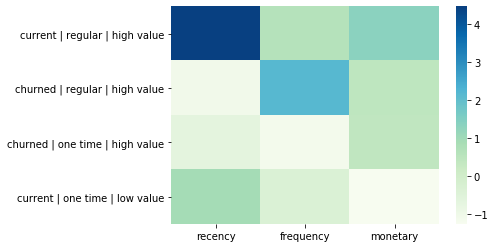

In [159]:
import seaborn as sns
import string
sns.heatmap(km.cluster_centers_, cmap='GnBu', 
            xticklabels=rfm_df.columns,
            yticklabels=customer_segment_list)

In [160]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

Text(0, 0.5, 'TSNE 2')

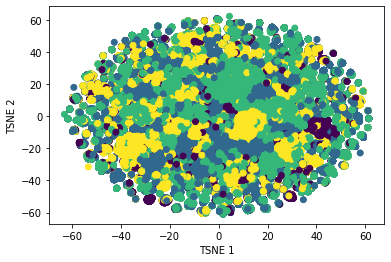

In [161]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=km.labels_)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')

# RFM-based Clustering

In [162]:
df

,order_id,payment_value,payment_installments,review_score,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_length_cm,...,customer_state_PR,customer_state_RJ,customer_state_RN,customer_state_RO,customer_state_RR,customer_state_RS,customer_state_SC,customer_state_SE,customer_state_SP,customer_state_TO
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,8.0,5.0,129.90,12.00,60.0,236.0,1.0,34.0,...,0,0,0,0,0,0,0,0,1,0
0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,1.0,4.0,18.90,8.29,56.0,635.0,1.0,26.0,...,0,0,0,0,0,0,0,0,1,0
0000f46a3911fa3c0805444483337064,1,86.22,8.0,3.0,69.00,17.22,49.0,177.0,3.0,25.0,...,0,0,0,0,0,0,1,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,1,43.62,4.0,4.0,25.99,17.63,43.0,1741.0,5.0,19.0,...,0,0,0,0,0,0,0,0,0,0
0004aac84e0df4da2b147fca70cf8255,1,196.89,6.0,5.0,180.00,16.89,58.0,794.0,3.0,16.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,4134.84,10.0,5.0,785.00,248.71,54.0,478.5,1.0,55.0,...,0,0,0,0,0,0,0,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,1,84.58,1.0,4.0,64.89,19.69,37.0,506.0,2.0,33.0,...,0,0,0,0,0,0,0,0,0,0
ffff371b4d645b6ecea244b27531430a,1,112.46,1.0,5.0,89.90,22.56,57.0,716.0,5.0,17.0,...,0,0,0,0,0,0,0,0,0,0


## Standard Scaler

In [163]:
rfm_df = df[['order_purchase_timestamp', 'order_id', 'payment_value']]
rfm_df.columns = ['recency', 'frequency', 'monetary']

In [164]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(rfm_df)

## Elbow Diagram

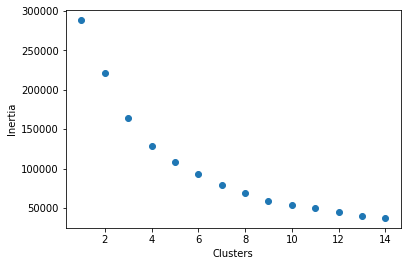

In [165]:
from sklearn.cluster import KMeans
inertia_dict = {}
for k in range(1,15):
    rfm_km = KMeans(n_clusters=k).fit(X)
    inertia_dict[k] = rfm_km.inertia_
    
plt.scatter(inertia_dict.keys(), inertia_dict.values())
plt.xlabel('Clusters')
plt.ylabel('Inertia');

In [166]:
n_clusters = 4

## K-means Clustering

In [167]:
km = KMeans(n_clusters=n_clusters).fit(X)
labels = km.labels_

In [168]:
np.bincount(labels)

array([53181,  3775, 39117,    23], dtype=int64)

In [169]:
label_count_df = pd.DataFrame(labels)

In [170]:
km.cluster_centers_

array([[-0.71974737, -0.14507272, -0.06783191],
       [-0.04158182,  3.36999397,  1.40037808],
       [ 0.98254411, -0.13777152, -0.06646364],
       [-0.1169028 , 15.71785356, 39.65182594]])

In [171]:
km.cluster_centers_[1,1]

3.3699939733386683

In [172]:
n_clusters

4

Text(0, 0.5, 'Monetary')

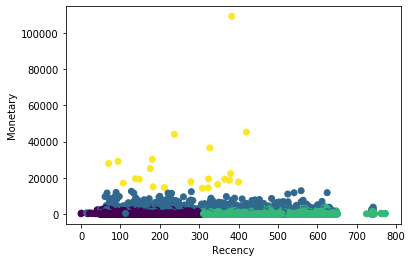

In [173]:
plt.scatter(rfm_df.recency, rfm_df.monetary, c=labels)
plt.xlabel('Recency')
plt.ylabel('Monetary')

Text(0, 0.5, 'Monetary')

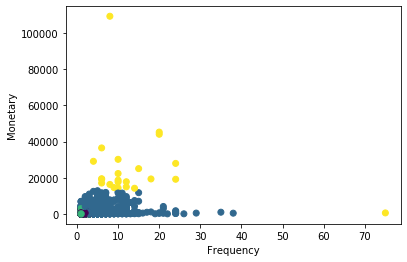

In [174]:
plt.scatter(rfm_df.frequency, rfm_df.monetary, c=labels)
plt.xlabel('Frequency')
plt.ylabel('Monetary')

In [175]:
customer_segment_list = []
for cluster in range(n_clusters):
    if km.cluster_centers_[cluster, 0] > 0:
        customer_segment_list.append('current | ')
    else:
        customer_segment_list.append('churned | ')
    if km.cluster_centers_[cluster, 1] > 0:
        customer_segment_list[cluster] += 'regular | '
    else:
        customer_segment_list[cluster] += 'one time | '
    if km.cluster_centers_[cluster, 2] > 0:
        customer_segment_list[cluster] += 'high value'
    else:
        customer_segment_list[cluster] += 'low value'

customer_segment_list

['churned | one time | low value',
 'churned | regular | high value',
 'current | one time | low value',
 'churned | regular | high value']

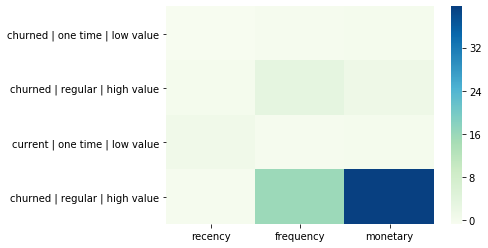

In [176]:
import seaborn as sns
import string
sns.heatmap(km.cluster_centers_, cmap='GnBu', 
            xticklabels=rfm_df.columns,
            yticklabels=customer_segment_list)

In [177]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

Text(0, 0.5, 'TSNE 2')

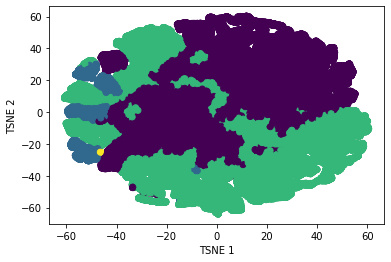

In [178]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')

TSNE visualization verifies that RFM-based clusters have superior quality compared to PCA-based clusters as well.